<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/RobustPeriod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade git+https://github.com/ariaghora/robust-period.git

  Cloning https://github.com/ariaghora/robust-period.git to /tmp/pip-req-build-adbo4_1u
  Running command git clone -q https://github.com/ariaghora/robust-period.git /tmp/pip-req-build-adbo4_1u
  Created wheel for RobustPeriod: filename=RobustPeriod-0.2.1-cp37-none-any.whl size=7871 sha256=43179d04d1613352880fb2c4159af1f92e803bd223c3d6d22ef514458c40f241
  Stored in directory: /tmp/pip-ephem-wheel-cache-u34ml0fy/wheels/39/21/ed/812d8ea00c65cf3b42d8403c6a3add974a45b2c2b700313d1c
Successfully built RobustPeriod


Code below is from https://github.com/ariaghora/robust-period

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


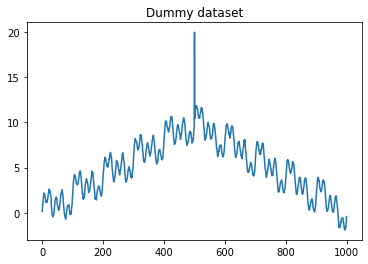

Calculating periodogram for level 1
Calculating periodogram for level 2
Calculating periodogram for level 3
Calculating periodogram for level 4
Calculating periodogram for level 5
Calculating periodogram for level 6
Calculating periodogram for level 7
Calculating periodogram for level 8


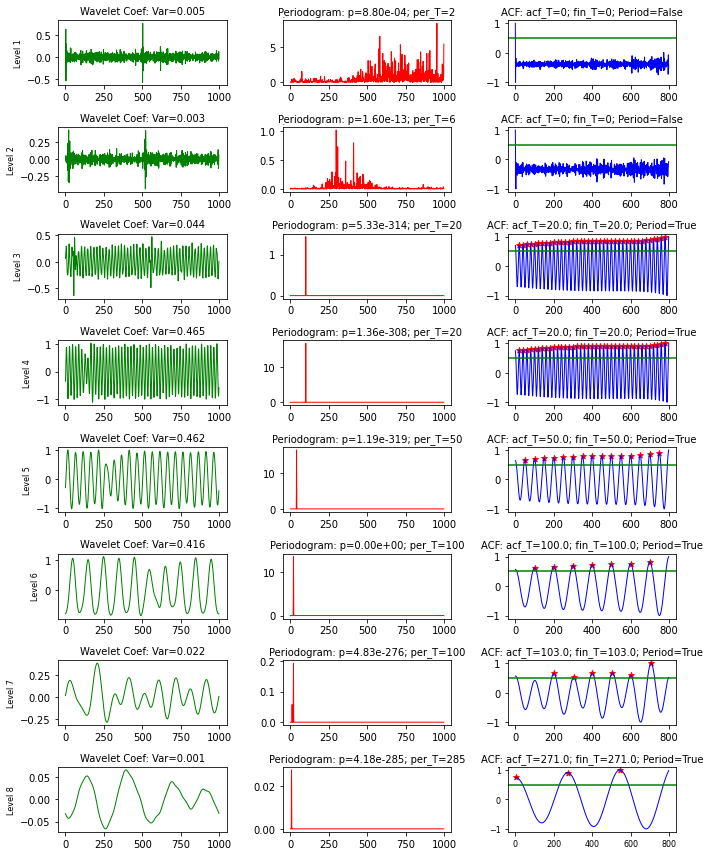

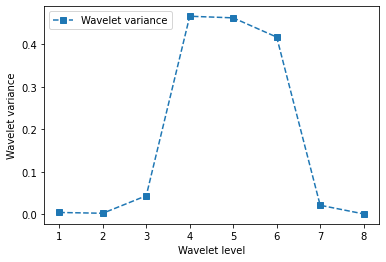

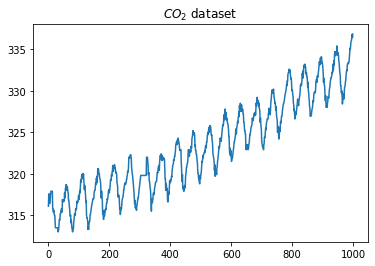

Calculating periodogram for level 1
Calculating periodogram for level 2
Calculating periodogram for level 3
Calculating periodogram for level 4
Calculating periodogram for level 5
Calculating periodogram for level 6
Calculating periodogram for level 7
Calculating periodogram for level 8


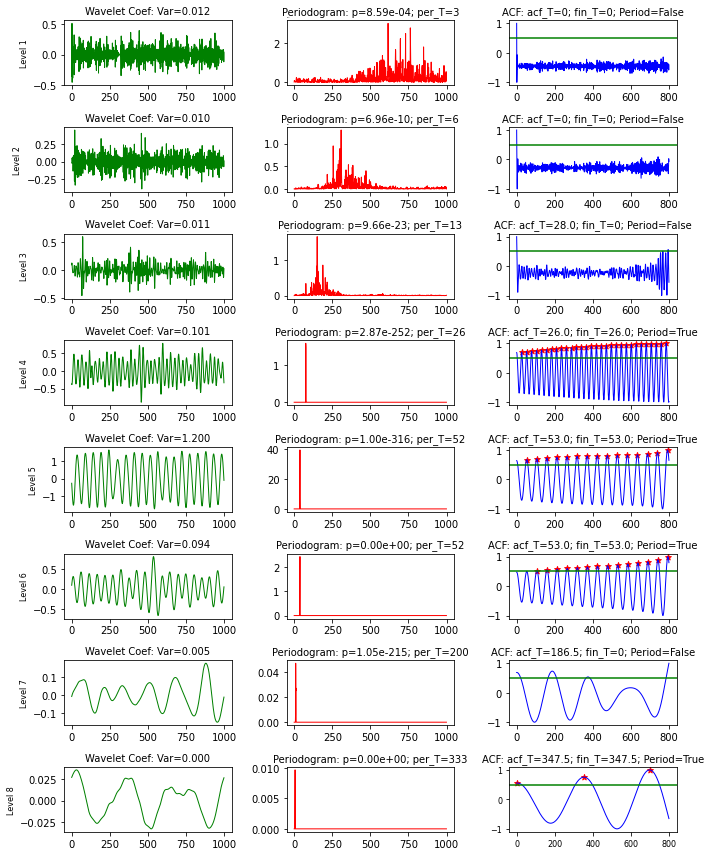

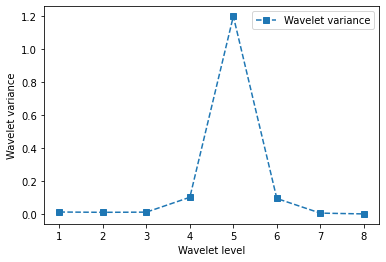

Calculating periodogram for level 1
Calculating periodogram for level 2
Calculating periodogram for level 3
Calculating periodogram for level 4
Calculating periodogram for level 5
Calculating periodogram for level 6
Calculating periodogram for level 7
Calculating periodogram for level 8
Calculating periodogram for level 1
Calculating periodogram for level 2
Calculating periodogram for level 3
Calculating periodogram for level 4
Calculating periodogram for level 5
Calculating periodogram for level 6
Calculating periodogram for level 7
Calculating periodogram for level 8
Periods for series 1: [ 20.  50. 100. 103. 271.]
Periods for series 2: [ 26.   53.  347.5]


/usr/local/lib/python3.7/dist-packages/robustperiod/robustperiod.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(periods_list)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from robustperiod import robust_period, robust_period_full, plot_robust_period
from robustperiod.utils import sinewave, triangle
from statsmodels.datasets.co2.data import load_pandas

if __name__ == '__main__':
    '''
    Dummy dataset
    '''
    m = 1000
    y1 = sinewave(m, 20, 1)
    y2 = sinewave(m, 50, 1)
    y3 = sinewave(m, 100, 1)
    tri = triangle(m, 10)
    noise = np.random.normal(0, 0.1, m)
    y = y1+y2+y3+tri+noise
    y[m // 2] += 10  # sudden spike

    plt.plot(y)
    plt.title('Dummy dataset')
    plt.show()

    lmb = 1e+6
    c = 2
    num_wavelets = 8
    zeta = 1.345

    periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
        y, 'db10', num_wavelets, lmb, c, zeta)
    plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)

    '''
    CO_2 dataset
    '''
    co2 = load_pandas()

    # We only take 1000 samples due to numerical error by binom coef. computation
    # when N is large
    y_co2 = co2.data.fillna(method='ffill').values.squeeze()[:1000]
    plt.plot(y_co2)
    plt.title('$CO_2$ dataset')
    plt.show()

    periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
        y_co2, 'db10', num_wavelets, lmb, c, zeta)
    plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)

    '''
    RobustPeriod on multiple series combined
    '''
    combined = np.array([y, y_co2]).T
    periods_list = robust_period(combined, 'db10', num_wavelets, lmb, c, zeta)

    for i, periods in enumerate(periods_list):
        print(f'Periods for series {i+1}: {periods}')